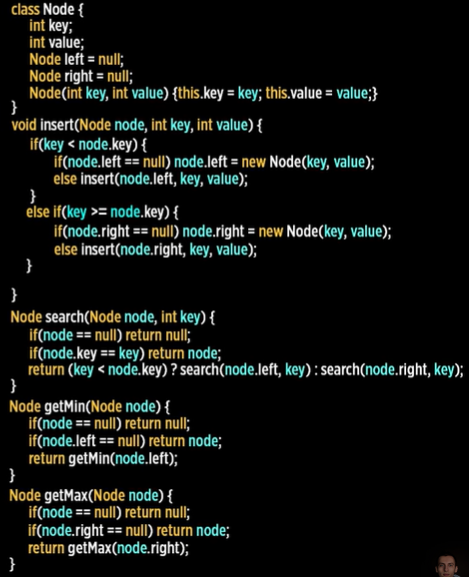
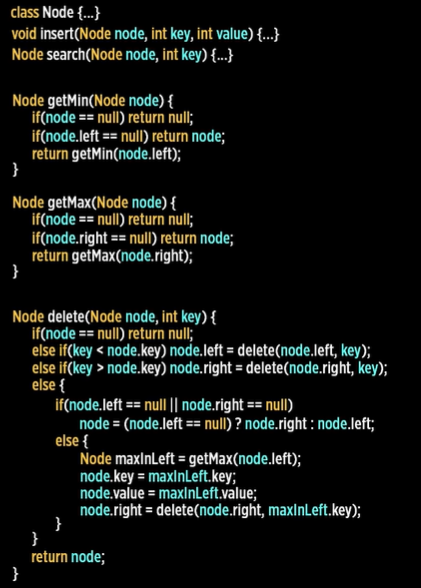
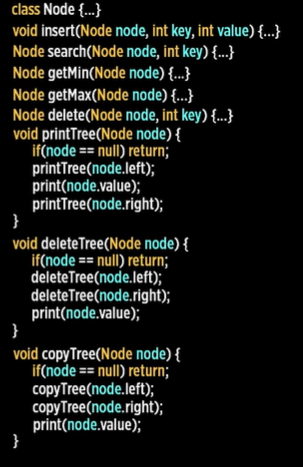
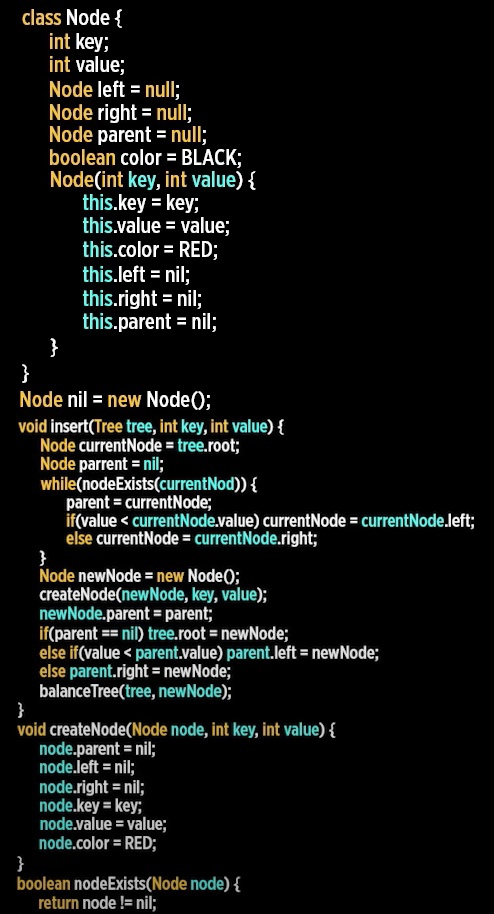
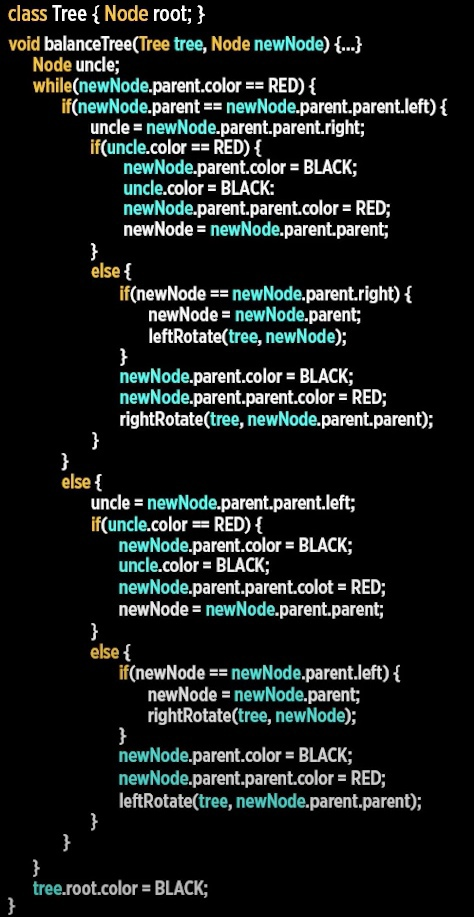

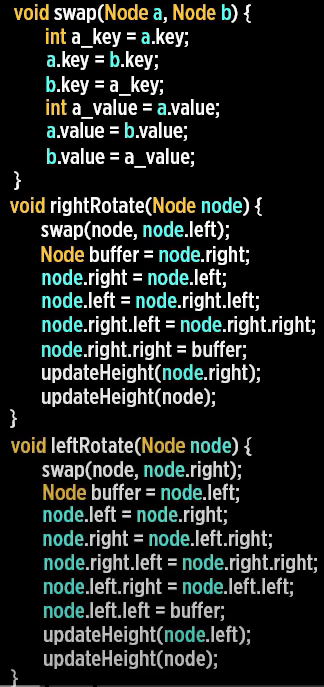

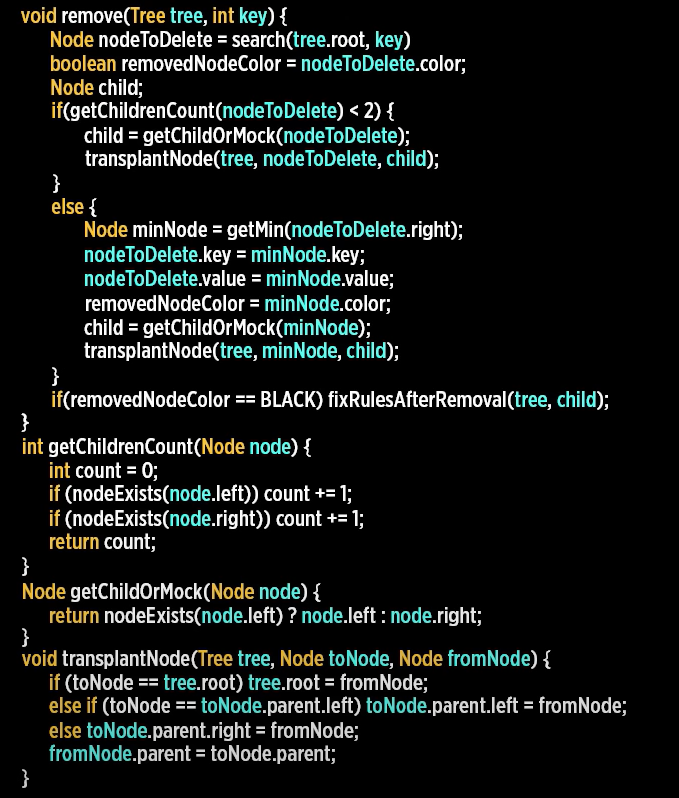

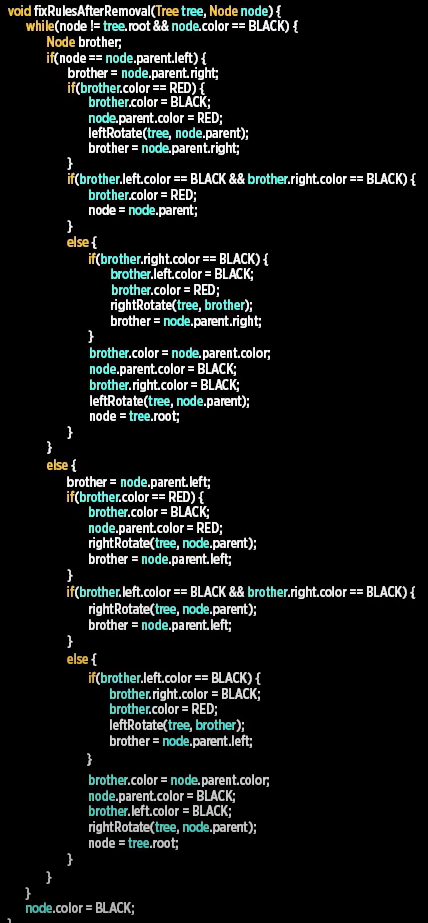

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None


class Tree:
    def __init__(self):
        self.root = None

    def __find(self, node, parent, value):
        if node is None:
            return None, parent, False
        if value == node.data:
            return node, parent, True
        
        if value < node.data:
            if node.left:
                return self.__find(node.left, node, value)
        if value > node.data:
            if node.right:
                return self.__find(node.right, node, value)
        return node, parent, False

    def append(self, obj):
        if self.root is None:
            self.root = obj
            return obj
         
        s, p, fl_find = self.__find(self.root, None, obj.data)

        if not fl_find and s:
            if obj.data < s.data:
                s.left = obj
            else:
                s.right = obj

        return obj

    def show_tree(self, node):
        if node is None:
            return

        self.show_tree(node.left)
        print(node.data)
        self.show_tree(node.right)

    def show_wide_tree(self, node):
        if node is None:
            return
        
        v = [node]
        while v:
            vn = []
            for x in v:
                print(x.data, end=" ")
                if x.left:
                    vn += [x.left]
                if x.right:
                    vn += [x.right]
            print()
            v = vn

    def __del_leaf(self, s, p):
        if p.left == s:
            p.left = None
        elif p.right == s:
            p.right = None

    def __del_one_child(self, s, p):
        if p.left == s:
            p.left = s.right if s.left is None else s.left
        elif p.right == s:
            p.right = s.right if s.left is None else s.left    

    def __find_min(self, node, parent):
        if node.left:
            return self.__find_min(node.left, node)
        return node, parent

    def del_node(self, key):
        s, p, fl_find = self.__find(self.root, None, key)

        if not fl_find:
            return None
        
        if s.left is None and s.right is None:
            self.__del_leaf(s, p)
        elif s.left is None or s.right is None:
            self.__del_one_child(s, p)
        else:
            sr, pr = self.__find_min(s.right, s)
            s.data = sr.data
            self.__del_one_child(sr, pr)


In [4]:
v = [10, 5, 7, 16, 13, 2, 20]

t = Tree()
for x in v:
    t.append(Node(x))

t.del_node(5)

t.show_wide_tree(t.root)

10 
7 16 
2 13 20 


In [4]:
class Node:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None
        self.parent = None
        self.color = "BLACK"

nil = Node()

class Tree:
    def __init__(self):
        self.root = nil

def insert(tree, value):
    current_node = tree.root
    parent = nil
    while current_node != nil:
        parent = current_node
        if value < current_node.value:
            current_node = current_node.left
        else:
            current_node = current_node.right
    new_node = create_node(value)
    new_node.parent = parent
    if parent == nil:
        tree.root = new_node
    elif value < parent.value:
        parent.left = new_node
    else:
        parent.right = new_node
    balance_tree(tree, new_node)

def create_node(value):
    node = Node()
    node.left = nil
    node.right = nil
    node.value = value
    node.color = "RED"
    return node

def balance_tree(tree, new_node):
    # папаша - красный
    while new_node.parent.color == "RED":
        grandpa = new_node.parent.parent
        # отец — левый ребенок деда
        if new_node.parent == grandpa.left:
            uncle = grandpa.right
            if uncle.color == "RED":
                new_node.parent.color = "BLACK"
                uncle.color = "BLACK"
                grandpa.color = "RED"
                new_node = grandpa
            else:
                # новый узел - правый сын
                if new_node == new_node.parent.right:
                    new_node = new_node.parent
                    left_rotate(new_node)
                    grandpa = new_node.parent.parent
                new_node.parent.color = "BLACK"
                grandpa.color = "RED"
                right_rotate(grandpa)
        # отец — правый ребенок деда
        else:
            uncle = grandpa.left
            if uncle.color == "RED":
                new_node.parent.color = "BLACK"
                uncle.color = "BLACK"
                grandpa.color = "RED"
                new_node = grandpa
            else:
                if new_node == new_node.parent.left:
                    new_node = new_node.parent
                    right_rotate(new_node)
                    grandpa = new_node.parent.parent
                new_node.parent.color = "BLACK"
                grandpa.color = "RED"
                left_rotate(grandpa)
    tree.root.color = "BLACK"

def swap(x, y):
    x.value, y.value = y.value, x.color
    x.color, y.color = y.color, x.color
    x.parent, y.parent = y.parent, x.parent

def right_rotate(node):
    swap(node.left, node)
    buffer = node.right
    node.right = node.left
    node.left = node.right.left
    node.right.left = node.right.right
    node.right.right = buffer

def left_rotate(node):
    swap(node, node.right)
    buffer = node.left
    node.left = node.right
    node.right = node.left.right
    node.left.right = node.left.left
    node.left.left = buffer

In [ ]:
class Node:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None
        self.parent = None
        self.color = "BLACK"


class Tree:
    NIL = Node()

    def __init__(self):
        self.root = Tree.NIL

    def insert(self, value):
        current_node = self.root
        parent = Tree.NIL
        while current_node != Tree.NIL:
            parent = current_node
            if value < current_node.value:
                current_node = current_node.left
            else:
                current_node = current_node.right
        new_node = self.__create_node(value)
        new_node.parent = parent

        if parent == Tree.NIL:
            self.root = new_node
        elif value < parent.value:
            parent.left = new_node
        else:
            parent.right = new_node

        self._balance_tree(new_node)

    def __create_node(self, value):
        node = Node()
        node.left = Tree.NIL
        node.right = Tree.NIL
        node.value = value
        node.color = "RED"
        return node


    def _balance_tree(self, node):
        # папаша - красный
        while node.parent.color == "RED":
            # отец — левый ребенок деда
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    # новый узел - правый сын
                    if node == node.parent.right:
                        node = node.parent
                        self.__left_rotate(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.__right_rotate(node.parent.parent)
            # отец — правый ребенок деда
            else:
                uncle = node.parent.parent.left
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    # новый узел - левый сын
                    if node == node.parent.left:
                        node = node.parent
                        self.__right_rotate(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.__left_rotate(node.parent.parent)
        self.root.color = "BLACK"


    def __swap(self, x, y):
        x.value, y.value = y.value, x.value
        x.color, y.color = y.color, x.color


    def __right_rotate(self, node):
        self.__swap(node.left, node)
        buffer = node.right
        node.right = node.left
        node.left = node.right.left
        node.right.left = node.right.right
        node.right.right = buffer


    def __left_rotate(self, node):
        self.__swap(node, node.right)
        buffer = node.left
        node.left = node.right
        node.right = node.left.right
        node.left.right = node.left.left
        node.left.left = buffer

tree = Tree()
tree.insert(24)
tree.insert(14)
tree.insert(37)
tree.insert(18)
tree.insert(15)
tree.insert(12)
tree.insert(0)
tree.insert(11)

In [ ]:
class Node:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None
        self.parent = None
        self.color = "BLACK"


class Tree:
    NIL = Node()

    def __init__(self):
        self.root = Tree.NIL

    def insert(self, value):
        """
        Вставляет новый узел с указанным значением в красно-черное дерево.
        """
        current_node = self.root
        parent = Tree.NIL
        while current_node != Tree.NIL:
            parent = current_node
            if value < current_node.value:
                current_node = current_node.left
            else:
                current_node = current_node.right
        new_node = self.__create_node(value)
        new_node.parent = parent

        if parent == Tree.NIL:
            self.root = new_node
        elif value < parent.value:
            parent.left = new_node
        else:
            parent.right = new_node

        self._balance_tree(new_node)

    def __create_node(self, value):
        """
        Создает новый узел красного цвета для вставки в красно-черное дерево
        """
        node = Node()
        node.left = Tree.NIL
        node.right = Tree.NIL
        node.value = value
        node.color = "RED"
        return node

    def _balance_tree(self, node):
        """
        Корректирует дерево после вставки нового узла, чтобы поддерживать свойства красно-черного дерева.
        """
        # папаша - красный
        while node.parent.color == "RED":
            # отец — левый ребенок деда
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    # новый узел - правый сын
                    if node == node.parent.right:
                        node = node.parent
                        self.__rotate_left(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.__rotate_right(node.parent.parent)
            # отец — правый ребенок деда
            else:
                uncle = node.parent.parent.left
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    # новый узел - левый сын
                    if node == node.parent.left:
                        node = node.parent
                        self.__rotate_right(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.__rotate_left(node.parent.parent)
        self.root.color = "BLACK"

    def __rotate_left(self, node):
        """
        Выполняет левый поворот относительно указанного узла.
        """
        right_child = node.right
        node.right = right_child.left
        if right_child.left:
            right_child.left.parent = node
        right_child.parent = node.parent
        if node.parent == Tree.NIL:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child
        right_child.left = node
        node.parent = right_child

    def __rotate_right(self, node):
        """
        Выполняет правый поворот относительно указанного узла.
        """
        left_child = node.left
        node.left = left_child.right
        if left_child.right:
            left_child.right.parent = node
        left_child.parent = node.parent
        if node.parent == Tree.NIL:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child
        left_child.right = node
        node.parent = left_child

tree = Tree()
tree.insert(24)
tree.insert(14)
tree.insert(37)
tree.insert(18)
tree.insert(15)
tree.insert(12)
tree.insert(0)
tree.insert(11)
tree.insert(40)

In [1]:
BLACK = "BLACK"
RED = "RED"


class Node:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None
        self.parent = None
        self.color = BLACK


class Tree:

    def __init__(self):
        self.NIL = Node()
        self.root = self.NIL

    def insert(self, value):
        """
        Вставляет новый узел с указанным значением в красно-черное дерево.
        """
        def create_node(_value):
            """
            Создает новый узел красного цвета для вставки в красно-черное дерево
            """
            node = Node()
            node.left = self.NIL
            node.right = self.NIL
            node.value = _value
            node.color = RED
            return node
        current_node = self.root
        parent = self.NIL
        while current_node != self.NIL:
            parent = current_node
            if value < current_node.value:
                current_node = current_node.left
            else:
                current_node = current_node.right
        new_node = create_node(value)
        new_node.parent = parent

        if parent == self.NIL:
            self.root = new_node
        elif value < parent.value:
            parent.left = new_node
        else:
            parent.right = new_node

        self._balance_tree(new_node)

    def _balance_tree(self, node):
        """
        Корректирует дерево после вставки нового узла, чтобы поддерживать свойства красно-черного дерева.
        """
        # папаша - красный
        while node.parent.color == RED:
            # отец — левый ребенок деда
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    # новый узел - правый сын
                    if node == node.parent.right:
                        node = node.parent
                        self.__rotate_left(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.__rotate_right(node.parent.parent)
            # отец — правый ребенок деда
            else:
                uncle = node.parent.parent.left
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    # новый узел - левый сын
                    if node == node.parent.left:
                        node = node.parent
                        self.__rotate_right(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.__rotate_left(node.parent.parent)
        self.root.color = BLACK

    def __rotate_left(self, node):
        """
        Выполняет левый поворот относительно указанного узла.
        """
        right_child = node.right
        node.right = right_child.left
        if right_child.left != self.NIL:
            right_child.left.parent = node
        right_child.parent = node.parent
        if node.parent == self.NIL:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child
        right_child.left = node
        node.parent = right_child

    def __rotate_right(self, node):
        """
        Выполняет правый поворот относительно указанного узла.
        """
        left_child = node.left
        node.left = left_child.right
        if left_child.right != self.NIL:
            left_child.right.parent = node
        left_child.parent = node.parent
        if node.parent == self.NIL:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child
        left_child.right = node
        node.parent = left_child

    def delete(self, value):
        def transplant(u, v):
            if u.parent == self.NIL:
                self.root = v
            elif u == u.parent.left:
                u.parent.left = v
            else:
                u.parent.right = v
            v.parent = u.parent

        def minimum(node):
            if node.left == self.NIL:
                return node
            return minimum(node.left)

        # поиск узла для удаления p
        p = self.root
        while p.value != value:
            if p.value < value:
                p = p.right
            else:
                p = p.left

        y = p
        y_original_color = y.color
        if p.left == self.NIL:
            x = p.right
            transplant(p, x)
        elif p.right == self.NIL:
            x = p.left
            transplant(p, x)
        else:
            y = minimum(p.right)
            y_original_color = y.color
            x = y.right
            if y.parent != p:
                # следы от элемента, который встанет на место удаляемого, тоже нужно удалить
                transplant(y, x)
                y.right = p.right
                y.right.parent = y
            transplant(p, y)
            y.left = p.left
            y.left.parent = y
            y.color = p.color

        if y_original_color == BLACK:
            self._fix_delete(x)

    def _fix_delete(self, node):
        while node != self.root and node.color == BLACK:
            if node == node.parent.left:
                s = node.parent.right
                if s.color == RED:
                    s.color = BLACK
                    node.parent.color = RED
                    self.__rotate_left(node.parent)
                    s = node.parent.right
                if s.left.color == BLACK and s.right.color == BLACK:
                    s.color = RED
                    node = node.parent
                else:
                    if s.right.color == BLACK:
                        s.left.color = BLACK
                        s.color = RED
                        self.__rotate_right(s)
                        s = node.parent.right
                    s.color = node.parent.color
                    node.parent.color = BLACK
                    s.right.color = BLACK
                    self.__rotate_left(node.parent)
                    node = self.root
            else:
                s = node.parent.left
                if s.color == RED:
                    s.color = BLACK
                    node.parent.color = RED
                    self.__rotate_right(node.parent)
                    s = node.parent.left
                if s.right.color == BLACK and s.left.color == BLACK:
                    s.color = RED
                    node = node.parent
                else:
                    if s.left.color == BLACK:
                        s.right.color = BLACK
                        s.color = RED
                        self.__rotate_left(s)
                        s = node.parent.left
                    s.color = node.parent.color
                    node.parent.color = BLACK
                    s.left.color = BLACK
                    self.__rotate_right(node.parent)
                    node = self.root
        node.color = BLACK

In [ ]:
def visualize_red_black_tree(tree):
    G = nx.DiGraph()
    node_colors = []

    def add_nodes_edges(node, parent=None):
        if node is None:
            return
        G.add_node(node.key)
        if parent:
            G.add_edge(parent.key, node.key)
        add_nodes_edges(node.left, node)
        add_nodes_edges(node.right, node)
        node_colors.append(node.color)

    add_nodes_edges(tree.root)

    node_colors = [RED if color == RED else BLACK for color in node_colors]

    pos = nx.spring_layout(G)  # layout for the tree

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, edge_color='black', linewidths=1, font_colorwhite')
    plt.show()

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание графа
G = nx.Graph()

# Функция для добавления узлов и рёбер к графу для визуализации красно-черного дерева
def add_nodes_edges(node, parent, graph=None):
    if graph is None:
        graph = nx.Graph()
    if node == Node():
        return graph
    graph.add_node(node.value, color=node.color)  # Добавление узла с цветом
    if parent != Node():
        graph.add_edge(parent.value, node.value)  # Добавление ребра между узлом и его родителем
    if node.left:
        add_nodes_edges(node.left, node, graph)  # Рекурсивное добавление для левого поддерева
    if node.right:
        add_nodes_edges(node.right, node, graph)  # Рекурсивное добавление для правого поддерева
    return graph

# Визуализация красно-черного дерева
def visualize_red_black_tree(tree):
    graph = add_nodes_edges(tree, None)
    pos = nx.spring_layout(graph)  # Задание позиций узлов для визуализации
    color_map = []
    for node in graph.nodes(data=True):
        if node[1]['color'] == 'red':
            color_map.append('red')
        else:
            color_map.append('black')
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, with_labels=True, node_color=color_map, arrowsize=20)
    plt.show()

tree = Tree()
nodes = [20, 10, 25, 4, 16, 23, 30, 2, 5, 14, 17, 3, 12, 15, 19, 11, 18]
for n in nodes:
    tree.insert(n)
tree.delete(5)
tree.delete(10)
tree.delete(4)

visualize_red_black_tree(tree.root)

AttributeError: 'NoneType' object has no attribute 'value'

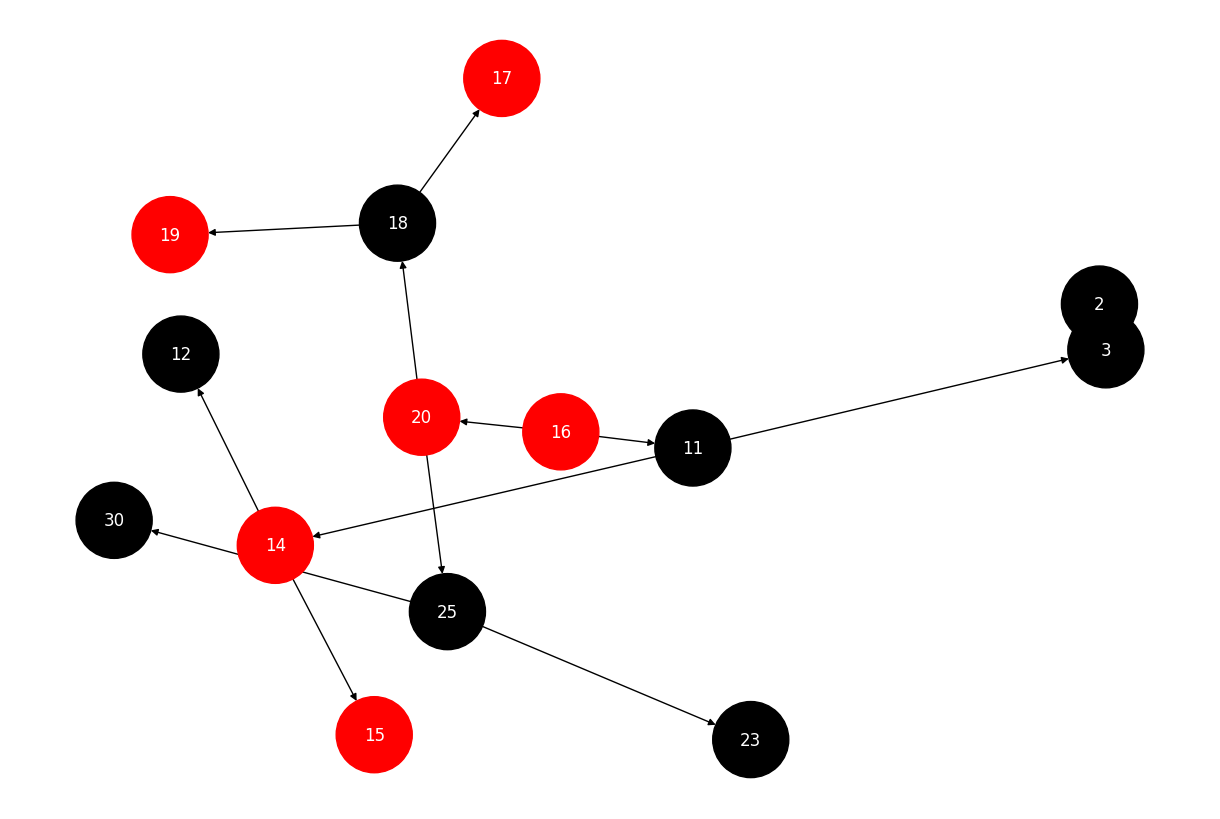

In [7]:
tree = Tree()
nodes = [20, 10, 25, 4, 16, 23, 30, 2, 5, 14, 17, 3, 12, 15, 19, 11, 18]
for n in nodes:
    tree.insert(n)
tree.delete(5)
tree.delete(10)
tree.delete(4)

visualize_red_black_tree(tree)

In [2]:
import networkx as nx

g=nx.DiGraph()
g.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9),
                  (4,10), (5,11), (5,12), (6,13)])
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('example.png')

C:\Users\seito\AppData\Local\Temp\ipykernel_2680\2989111295.py:6: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  p=nx.drawing.nx_pydot.to_pydot(g)


In [14]:
from collections import deque
import pygraphviz as pgv


BLACK = "BLACK"
RED = "RED"


class Node:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None
        self.parent = None
        self.color = BLACK


class Tree:

    def __init__(self):
        self.NIL = Node()
        self.root = self.NIL

    def insert(self, value):
        """
        Вставляет новый узел с указанным значением в красно-черное дерево.
        """
        def create_node(_value):
            """
            Создает новый узел красного цвета для вставки в красно-черное дерево
            """
            node = Node()
            node.left = self.NIL
            node.right = self.NIL
            node.value = _value
            node.color = RED
            return node
        current_node = self.root
        parent = self.NIL
        while current_node != self.NIL:
            parent = current_node
            if value < current_node.value:
                current_node = current_node.left
            else:
                current_node = current_node.right
        new_node = create_node(value)
        new_node.parent = parent

        if parent == self.NIL:
            self.root = new_node
        elif value < parent.value:
            parent.left = new_node
        else:
            parent.right = new_node

        self._balance_tree(new_node)

    def _balance_tree(self, node):
        """
        Корректирует дерево после вставки нового узла, чтобы поддерживать свойства красно-черного дерева.
        """
        # папаша - красный
        while node.parent.color == RED:
            # отец — левый ребенок деда
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    # новый узел - правый сын
                    if node == node.parent.right:
                        node = node.parent
                        self.__rotate_left(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.__rotate_right(node.parent.parent)
            # отец — правый ребенок деда
            else:
                uncle = node.parent.parent.left
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    # новый узел - левый сын
                    if node == node.parent.left:
                        node = node.parent
                        self.__rotate_right(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.__rotate_left(node.parent.parent)
        self.root.color = BLACK

    def __rotate_left(self, node):
        """
        Выполняет левый поворот относительно указанного узла.
        """
        right_child = node.right
        node.right = right_child.left
        if right_child.left != self.NIL:
            right_child.left.parent = node
        right_child.parent = node.parent
        if node.parent == self.NIL:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child
        right_child.left = node
        node.parent = right_child

    def __rotate_right(self, node):
        """
        Выполняет правый поворот относительно указанного узла.
        """
        left_child = node.left
        node.left = left_child.right
        if left_child.right != self.NIL:
            left_child.right.parent = node
        left_child.parent = node.parent
        if node.parent == self.NIL:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child
        left_child.right = node
        node.parent = left_child

    def delete(self, value):
        def transplant(u, v):
            if u.parent == self.NIL:
                self.root = v
            elif u == u.parent.left:
                u.parent.left = v
            else:
                u.parent.right = v
            v.parent = u.parent

        def minimum(node):
            if node.left == self.NIL:
                return node
            return minimum(node.left)

        # поиск узла для удаления p
        p = self.root
        while p.value != value:
            if p.value < value:
                p = p.right
            else:
                p = p.left

        y = p
        y_original_color = y.color
        if p.left == self.NIL:
            x = p.right
            transplant(p, x)
        elif p.right == self.NIL:
            x = p.left
            transplant(p, x)
        else:
            y = minimum(p.right)
            y_original_color = y.color
            x = y.right
            if y.parent != p:
                # следы от элемента, который встанет на место удаляемого, тоже нужно удалить
                transplant(y, x)
                y.right = p.right
                y.right.parent = y
            transplant(p, y)
            y.left = p.left
            y.left.parent = y
            y.color = p.color

        if y_original_color == BLACK:
            self._fix_delete(x)

    def _fix_delete(self, node):
        while node != self.root and node.color == BLACK:
            if node == node.parent.left:
                s = node.parent.right
                if s.color == RED:
                    s.color = BLACK
                    node.parent.color = RED
                    self.__rotate_left(node.parent)
                    s = node.parent.right
                if s.left.color == BLACK and s.right.color == BLACK:
                    s.color = RED
                    node = node.parent
                else:
                    if s.right.color == BLACK:
                        s.left.color = BLACK
                        s.color = RED
                        self.__rotate_right(s)
                        s = node.parent.right
                    s.color = node.parent.color
                    node.parent.color = BLACK
                    s.right.color = BLACK
                    self.__rotate_left(node.parent)
                    node = self.root
            else:
                s = node.parent.left
                if s.color == RED:
                    s.color = BLACK
                    node.parent.color = RED
                    self.__rotate_right(node.parent)
                    s = node.parent.left
                if s.right.color == BLACK and s.left.color == BLACK:
                    s.color = RED
                    node = node.parent
                else:
                    if s.left.color == BLACK:
                        s.right.color = BLACK
                        s.color = RED
                        self.__rotate_left(s)
                        s = node.parent.left
                    s.color = node.parent.color
                    node.parent.color = BLACK
                    s.left.color = BLACK
                    self.__rotate_right(node.parent)
                    node = self.root
        node.color = BLACK

    def draw_img(self, img_name='Red_Black_Tree.png'):
        "" "Pygraphviz painted red black tree" ""
        if self.root is None:
            return

        tree = pgv.AGraph(directed=True, strict=True)

        queue = deque([self.root])
        num = 0
        while queue:
            e = queue.popleft()
            if e != self.NIL:  # #
                tree.add_node(e.value, color=e.color, fontcolor="white", style="filled",
                              fontname="Microsoft YaHei", shape="circle", margin=0)
                for c in [e.left, e.right]:
                    queue.append(c)
                    if c != self.NIL:
                        tree.add_edge(e.value, c.value)
                    else:
                        num += 1
                        tree.add_node("nil%s" % num, label="Nil", color="black", fontcolor="white", style="filled",
                                      fontname="Microsoft YaHei", shape="circle", margin=0)
                        tree.add_edge(e.value, "nil%s" % num)

        tree.graph_attr['epsilon'] = '0.01'
        tree.layout('dot')
        tree.draw(img_name)



tree = Tree()
nodes = [20, 10, 25, 4, 16, 23, 5, 17, 3, 12, 15, 19, 11, 18]
for n in nodes:
    tree.insert(n)
tree.delete(5)
tree.delete(10)
tree.delete(4)


tree.draw_img()